# Actividad 2: Machine Learning supervisado

## Comprensión del Negocio

## Compresión de los Datos

In [2]:
# ############################################################
# Parte general para todos los modelos de clasificación IRIS
# ############################################################

# librerías generales
import pandas as pd
import numpy as np
import scikitplot as skplt # pip install scikitplot
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler



In [11]:
import os
os.getcwd()

'/Users/computerservice/Caso Practico/NOTEBOOKS'

In [3]:
# Lectura de datos

i_data = pd.read_csv("../DATA/RAW/bank-sem-entrenamiento.csv", index_col="cod_cliente")
i_data.head()

,edad_cliente,margen_beneficio,sdo_financiacion,sdo_inversion,sdo_inversion_fuera_bal,sdo_inversion_no_T1,sdo_financiacion_no_T1,imp_domiciliaciones_cargo,imp_cuota_pres_hip,imp_tarj_credito,...,sdo_avales,sdo_pres_hipotecarios,sdo_pres_personales,sdo_valores,imp_movimientos_cargo,imp_movimientos_abono,num_movimientos_cargo,num_movimientos_abono,num_accesos_banca_elec,flag
cod_cliente,,,,,,,,,,,,,,,,,,,,,
Client65,42,14.70,3217.68,334.04,0.00,334.04,3217.68,183.92,0.0,0.00,...,0.0,0.0,3217.68,0.0,-967.72,372.00,10,5,21,S
Client121,27,133.94,33238.77,220.21,1792.24,220.21,33238.77,31.19,0.0,622.22,...,0.0,0.0,33118.55,0.0,-320.29,1132.14,5,3,0,S
Client173,39,109.07,7054.84,1248.12,0.00,1248.12,7054.84,711.63,0.0,759.08,...,0.0,0.0,5445.42,0.0,-42.38,347.00,3,3,14,S
Client307,52,24.14,15956.21,1690.88,0.00,1690.88,15956.21,711.65,0.0,749.00,...,0.0,0.0,15859.21,0.0,-444.21,1856.86,8,3,4,N
Client359,28,92.13,4273.46,469.44,0.00,469.44,4273.46,135.34,0.0,0.00,...,0.0,0.0,4273.46,0.0,-302.49,973.93,6,3,0,S


In [9]:
i_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1133 entries, Client65 to Client76465
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad_cliente               1133 non-null   int64  
 1   margen_beneficio           1133 non-null   float64
 2   sdo_financiacion           1133 non-null   float64
 3   sdo_inversion              1133 non-null   float64
 4   sdo_inversion_fuera_bal    1133 non-null   float64
 5   sdo_inversion_no_T1        1133 non-null   float64
 6   sdo_financiacion_no_T1     1133 non-null   float64
 7   imp_domiciliaciones_cargo  1133 non-null   float64
 8   imp_cuota_pres_hip         1133 non-null   float64
 9   imp_tarj_credito           1133 non-null   float64
 10  imp_tarj_debito            1133 non-null   float64
 11  imp_domiciliaciones_nom    1133 non-null   float64
 12  imp_domiciliaciones_pen    1133 non-null   float64
 13  imp_domiciliaciones_desem  1133 non-nul

In [10]:
i_data.describe()

,edad_cliente,margen_beneficio,sdo_financiacion,sdo_inversion,sdo_inversion_fuera_bal,sdo_inversion_no_T1,sdo_financiacion_no_T1,imp_domiciliaciones_cargo,imp_cuota_pres_hip,imp_tarj_credito,...,sdo_avales,sdo_pres_hipotecarios,sdo_pres_personales,sdo_valores,imp_movimientos_cargo,imp_movimientos_abono,num_movimientos_cargo,num_movimientos_abono,num_accesos_banca_elec,flag
count,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,...,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,49.913504,28.034086,28057.447149,5496.177485,2195.558897,5618.334704,28292.337229,433.019497,202.602480,269.568517,...,6.274969,25589.848429,2051.295702,323.444395,-1524.427573,1483.616425,11.390115,3.160635,6.527802,0.498676
std,12.156064,73.119204,45783.884297,12731.785302,8366.688392,13169.174823,46039.888944,691.037106,315.134107,512.432683,...,156.153588,45117.150491,7914.693377,7166.596376,4802.650942,4414.040378,9.970609,3.022116,13.897415,0.500219
min,22.000000,-500.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-64.000000,...,0.000000,0.000000,0.000000,0.000000,-91624.720000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,3.540000,37.550000,423.570000,0.000000,432.400000,42.000000,69.710000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1434.130000,0.000000,5.000000,0.000000,0.000000,0.000000
50%,50.000000,14.510000,5826.870000,1538.510000,0.000000,1542.810000,6154.640000,250.710000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-678.970000,472.000000,9.000000,3.000000,0.000000,0.000000
75%,59.000000,47.740000,40116.810000,4823.030000,63.370000,4895.540000,40388.450000,542.700000,383.410000,340.190000,...,0.000000,38271.340000,587.290000,0.000000,-233.270000,1537.680000,15.000000,4.000000,8.000000,1.000000
max,84.000000,890.610000,435769.180000,202363.650000,108454.720000,202363.650000,435769.180000,13392.320000,4547.390000,3952.000000,...,5002.000000,424835.640000,201866.000000,224890.490000,0.000000,90160.980000,69.000000,34.000000,155.000000,1.000000


## Preparación de los datos

In [4]:
i_data['flag'] = i_data['flag'].map({'S':1,'N':0})
i_data.head()

,edad_cliente,margen_beneficio,sdo_financiacion,sdo_inversion,sdo_inversion_fuera_bal,sdo_inversion_no_T1,sdo_financiacion_no_T1,imp_domiciliaciones_cargo,imp_cuota_pres_hip,imp_tarj_credito,...,sdo_avales,sdo_pres_hipotecarios,sdo_pres_personales,sdo_valores,imp_movimientos_cargo,imp_movimientos_abono,num_movimientos_cargo,num_movimientos_abono,num_accesos_banca_elec,flag
cod_cliente,,,,,,,,,,,,,,,,,,,,,
Client65,42,14.70,3217.68,334.04,0.00,334.04,3217.68,183.92,0.0,0.00,...,0.0,0.0,3217.68,0.0,-967.72,372.00,10,5,21,1
Client121,27,133.94,33238.77,220.21,1792.24,220.21,33238.77,31.19,0.0,622.22,...,0.0,0.0,33118.55,0.0,-320.29,1132.14,5,3,0,1
Client173,39,109.07,7054.84,1248.12,0.00,1248.12,7054.84,711.63,0.0,759.08,...,0.0,0.0,5445.42,0.0,-42.38,347.00,3,3,14,1
Client307,52,24.14,15956.21,1690.88,0.00,1690.88,15956.21,711.65,0.0,749.00,...,0.0,0.0,15859.21,0.0,-444.21,1856.86,8,3,4,0
Client359,28,92.13,4273.46,469.44,0.00,469.44,4273.46,135.34,0.0,0.00,...,0.0,0.0,4273.46,0.0,-302.49,973.93,6,3,0,1


In [5]:
# identificar clase objetivo y variables independientes
X = i_data.loc[:, i_data.columns != 'flag']
y = i_data['flag']


In [6]:

# partir en train y test
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# modelo de preprocesamiento obtenido desde el conjunto de entrenamiento
md_prepro = StandardScaler()
md_prepro.fit(X_train)

StandardScaler()

In [7]:
# escalamos conjunto entrenamiento
X_train_scaled = md_prepro.transform(X_train)

# visualizamos estadísticas
df_describe = pd.DataFrame(X_train_scaled)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,...,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02
mean,-2.419250e-16,-2.688056e-17,-8.960186e-18,4.592095e-17,4.480093e-18,2.688056e-17,3.584074e-17,-3.136065e-17,-5.376111e-17,-8.960186e-18,...,5.376111e-17,-1.792037e-17,1.792037e-17,2.688056e-17,5.600116e-18,2.688056e-17,-1.568033e-17,7.616158e-17,2.352049e-17,-1.120023e-18
std,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,...,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00
min,-2.318882e+00,-7.315980e+00,-6.208709e-01,-4.159908e-01,-2.654670e-01,-4.095551e-01,-6.219428e-01,-7.260832e-01,-6.386445e-01,-6.488852e-01,...,-3.868603e-01,-4.427792e-02,-5.727428e-01,-2.590310e-01,-5.161717e-02,-1.901675e+01,-3.219349e-01,-1.155814e+00,-1.074057e+00,-4.625853e-01
25%,-7.437233e-01,-3.508370e-01,-6.186005e-01,-3.866998e-01,-2.654670e-01,-3.805978e-01,-6.196394e-01,-6.082595e-01,-6.386445e-01,-5.258414e-01,...,-3.471854e-01,-4.427792e-02,-5.727428e-01,-2.590310e-01,-5.161717e-02,-8.966952e-04,-3.219349e-01,-6.574664e-01,-1.074057e+00,-4.625853e-01
50%,2.404503e-03,-1.788735e-01,-4.769725e-01,-2.959829e-01,-2.654670e-01,-2.938270e-01,-4.681837e-01,-2.944912e-01,-6.386445e-01,-5.258414e-01,...,-2.330936e-01,-4.427792e-02,-5.727428e-01,-2.590310e-01,-5.161717e-02,1.747232e-01,-2.150746e-01,-2.587886e-01,-6.966174e-02,-4.625853e-01
75%,7.485323e-01,3.088399e-01,2.885078e-01,-4.719479e-02,-2.555983e-01,-5.406673e-02,2.833004e-01,1.803191e-01,5.292402e-01,1.508997e-01,...,2.114108e-02,-4.427792e-02,2.927547e-01,-1.482642e-01,-5.161717e-02,2.745006e-01,5.840507e-03,4.388975e-01,2.651368e-01,7.667254e-02
max,2.821109e+00,5.664294e+00,8.267568e+00,1.482868e+01,1.263453e+01,1.420404e+01,8.206259e+00,1.014076e+01,1.273437e+01,6.353501e+00,...,2.177184e+01,2.694894e+01,8.211441e+00,2.191783e+01,2.625382e+01,3.237740e-01,1.889774e+01,4.924023e+00,1.030909e+01,9.985536e+00


In [8]:
# escalamos conjunto de test (con el modelo de preprocesamiento del conjunto de entrenamiento)
X_test_scaled = md_prepro.transform(X_test)

# visualizamos estadísticas
df_describe = pd.DataFrame(X_test_scaled)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,...,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,-0.015883,-0.033885,-0.161885,-0.006488,-0.014393,-0.012762,-0.162523,0.019345,-0.142720,-0.025258,...,0.028645,-0.034707,-0.145391,-0.112224,-0.045933,0.006636,-0.018899,-0.068537,-0.052922,-0.075192
std,1.025647,1.032449,0.744644,0.855899,0.983686,0.825043,0.739749,1.488584,0.717232,0.949383,...,0.728654,0.176480,0.742898,0.420124,0.076102,1.045238,0.785487,0.977340,1.037933,0.766292
min,-2.153076,-3.088303,-0.620871,-0.415991,-0.265467,-0.409555,-0.621943,-0.726083,-0.638644,-0.525841,...,-0.386860,-0.044278,-0.572743,-0.259031,-0.051617,-12.340854,-0.321935,-1.155814,-1.074057,-0.462585
25%,-0.764449,-0.347349,-0.620871,-0.379965,-0.265467,-0.373497,-0.621943,-0.609138,-0.638644,-0.525841,...,-0.336713,-0.044278,-0.572743,-0.259031,-0.051617,0.060074,-0.321935,-0.682384,-1.074057,-0.462585
50%,0.002405,-0.224316,-0.582563,-0.313591,-0.265467,-0.306037,-0.569365,-0.341969,-0.638644,-0.525841,...,-0.239175,-0.044278,-0.572743,-0.259031,-0.051617,0.195732,-0.226400,-0.258789,-0.069662,-0.462585
75%,0.748532,0.156663,0.024982,-0.063774,-0.261405,-0.071919,0.029349,0.208786,0.358644,0.101749,...,0.096292,-0.044278,0.073421,-0.259031,-0.051617,0.276062,0.007080,0.239559,0.265137,0.076673
max,2.738206,11.904014,4.412571,6.613330,10.153759,6.328778,4.377387,21.909584,3.272841,7.072116,...,5.099668,3.209856,4.472531,2.817250,1.307792,0.323774,9.965435,5.721378,7.965503,4.525550


## Modelado

### No normalizado

#### Arbol de clasificación

In [12]:
#############################################
## Árbol de clasificación
#############################################

# librerías necesarias
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

# construcción del modelo y entrenamiento
np.random.seed(123)
md_tree = DecisionTreeClassifier()
md_tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Normalizado

In [18]:
#############################################
## Knn
#############################################

# construcción del modelo
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(123)
md_knn = KNeighborsClassifier()
md_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## Evaluación



### No normalizado

In [13]:
# predicción del conjunto de test
y_pred = md_tree.predict(X_test)

# dataframe con datos entrada y prediccion
o_pred = pd.concat([X_test,y_test],axis=1)
o_pred['class_pred']=y_pred
o_pred.head()

,edad_cliente,margen_beneficio,sdo_financiacion,sdo_inversion,sdo_inversion_fuera_bal,sdo_inversion_no_T1,sdo_financiacion_no_T1,imp_domiciliaciones_cargo,imp_cuota_pres_hip,imp_tarj_credito,...,sdo_pres_hipotecarios,sdo_pres_personales,sdo_valores,imp_movimientos_cargo,imp_movimientos_abono,num_movimientos_cargo,num_movimientos_abono,num_accesos_banca_elec,flag,class_pred
cod_cliente,,,,,,,,,,,,,,,,,,,,,
Client22056,52,57.42,11403.18,2400.78,3441.27,2400.78,11403.18,773.02,0.0,1904.95,...,0.00,9124.69,0.00,-19.89,1942.34,5,6,74,1,1
Client14206,43,67.23,816.20,24904.34,0.00,24904.34,816.20,1195.45,0.0,576.60,...,0.00,0.00,0.00,-3880.20,3394.51,28,12,13,0,0
Client14182,42,12.35,0.00,40.45,0.00,40.45,0.00,11.20,0.0,0.00,...,0.00,0.00,0.00,-257.20,268.56,10,3,0,1,1
Client72494,41,74.47,49701.51,5714.95,0.00,5714.95,49701.51,23.00,442.9,0.00,...,49701.51,0.00,2418.05,-464.01,0.00,10,0,20,0,0
Client47681,41,19.24,0.00,318.87,0.00,318.87,0.00,598.95,0.0,0.00,...,0.00,0.00,0.00,-43.35,352.00,3,3,0,1,0


In [14]:
# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[116  54]
 [ 68 102]]


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.68      0.66       170
           1       0.65      0.60      0.63       170

    accuracy                           0.64       340
   macro avg       0.64      0.64      0.64       340
weighted avg       0.64      0.64      0.64       340



In [63]:
# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = md_tree.predict_proba(X_test)


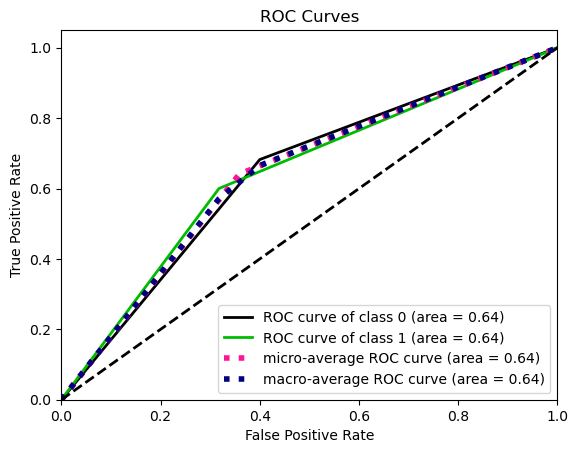

In [17]:
# curva roc
import scikitplot as skplt # %pip install scikit-plot

skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

### Normalizado

In [19]:
# predicción del conjunto de test
y_pred = md_knn.predict(X_test_scaled)

# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[112  58]
 [ 59 111]]


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       170
           1       0.66      0.65      0.65       170

    accuracy                           0.66       340
   macro avg       0.66      0.66      0.66       340
weighted avg       0.66      0.66      0.66       340



In [21]:

# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = md_knn.predict_proba(X_test_scaled)

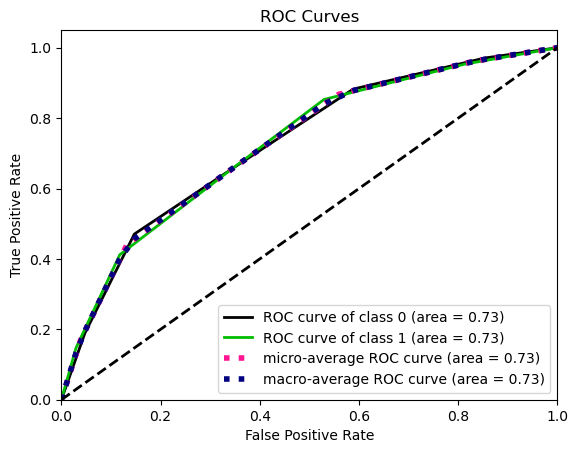

In [22]:
# curva roc
import scikitplot as skplt # %pip install scikit-plot

skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

## Despliegue

In [53]:
# Lectura de datos

i_productiondata = pd.read_csv("../DATA/RAW/bank-sem-aplicacion.csv")
cliente = i_productiondata['cod_cliente']
i_productiondata = i_productiondata.set_index('cod_cliente')
i_productiondata.head()

,edad_cliente,margen_beneficio,sdo_financiacion,sdo_inversion,sdo_inversion_fuera_bal,sdo_inversion_no_T1,sdo_financiacion_no_T1,imp_domiciliaciones_cargo,imp_cuota_pres_hip,imp_tarj_credito,...,sdo_cta_vista,sdo_avales,sdo_pres_hipotecarios,sdo_pres_personales,sdo_valores,imp_movimientos_cargo,imp_movimientos_abono,num_movimientos_cargo,num_movimientos_abono,num_accesos_banca_elec
cod_cliente,,,,,,,,,,,,,,,,,,,,,
Client697,55,6.71,0.00,467.18,35.91,467.18,0.00,148.03,0.00,0.00,...,467.18,0.0,0.00,0.00,0.00,-178.00,1133.99,5,3,0
Client1166,52,9.74,52650.40,143.70,1916.97,143.70,52650.40,261.66,344.64,372.00,...,143.70,0.0,52580.40,0.00,0.00,-306.39,0.00,9,0,0
Client1457,53,7.64,0.00,11231.73,0.00,11231.73,0.00,129.54,0.00,0.00,...,11231.73,0.0,0.00,0.00,6791.56,-425.95,1894.41,5,4,0
Client1906,44,5.40,0.00,378.66,0.00,378.66,0.00,50.42,0.00,0.00,...,378.66,0.0,0.00,0.00,0.00,-3665.57,2932.90,16,8,0
Client2481,58,103.17,20939.99,1410.40,0.00,1410.40,20939.99,1545.23,431.79,439.97,...,1410.40,0.0,16472.95,3436.67,0.00,-842.20,654.00,16,6,4


In [54]:
# escalamos conjunto entrenamiento
i_productiondata_scaled = md_prepro.transform(i_productiondata)

# visualizamos estadísticas
df_prod = pd.DataFrame(i_productiondata_scaled)
df_prod.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,-0.173350,-0.152892,0.035790,0.115787,-0.022653,0.100416,0.030268,-0.057841,0.001999,0.014601,...,-0.044455,0.056204,0.048029,-0.069170,-0.024087,-0.030084,0.031000,-0.005230,0.024082,0.093390
std,0.903912,0.830517,0.971632,1.380239,1.067222,1.323024,0.965047,0.756738,0.861331,0.918427,...,0.561201,1.123419,0.982474,0.532531,0.188532,0.987472,1.056580,1.135807,0.910552,1.120038
min,-2.153076,-2.590368,-0.620871,-0.415991,-0.265467,-0.409555,-0.621943,-0.726083,-0.638644,-0.525841,...,-0.386860,-0.044278,-0.572743,-0.259031,-0.051617,-9.823004,-0.321935,-1.155814,-1.074057,-0.462585
25%,-0.909529,-0.417274,-0.619198,-0.378325,-0.265467,-0.373449,-0.620282,-0.640863,-0.638644,-0.525841,...,-0.332883,-0.044278,-0.572743,-0.259031,-0.051617,-0.004597,-0.321935,-0.757136,-1.074057,-0.462585
50%,-0.246305,-0.205669,-0.477067,-0.296488,-0.265467,-0.294999,-0.479113,-0.308503,-0.638644,-0.525841,...,-0.243232,-0.044278,-0.572743,-0.259031,-0.051617,0.178086,-0.218123,-0.358458,-0.069662,-0.462585
75%,0.416920,0.153589,0.426082,0.013446,-0.255724,0.002105,0.417915,0.229943,0.515918,0.290055,...,0.016778,-0.044278,0.483037,-0.204713,-0.051617,0.286201,0.058168,0.438897,0.599935,0.211487
max,2.240788,2.493260,5.309239,11.443803,10.112286,10.959287,5.267979,2.819360,4.290833,3.443726,...,2.881517,12.515932,5.393245,3.291841,1.709767,0.323774,10.336213,5.322700,3.613122,8.367762


In [55]:
y_produccion=md_knn.predict(i_productiondata_scaled)


In [59]:
df_prod['cod_cliente']= cliente
df_prod['flag']= y_produccion
df_prod['flag'] = df_prod['flag'].map({1:'S',0:'N'})
df_prod = df_prod.set_index('cod_cliente')
df_prod

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,flag
cod_cliente,,,,,,,,,,,,,,,,,,,,,
Client697,0.416920,-0.304704,-0.620871,-0.380797,-0.261196,-0.375818,-0.621943,-0.475883,-0.638644,-0.525841,...,-0.044278,-0.572743,-0.259031,-0.051617,0.286201,-0.080202,-0.657466,-0.069662,-0.462585,N
Client1166,0.168211,-0.262852,0.453046,-0.405165,-0.037456,-0.399178,0.444696,-0.283826,0.374877,0.189351,...,-0.044278,0.514445,-0.259031,-0.051617,0.259100,-0.321935,-0.258789,-1.074057,-0.462585,N
Client1457,0.251114,-0.291858,-0.620871,0.430130,-0.265467,0.401539,-0.621943,-0.507135,-0.638644,-0.525841,...,-0.044278,-0.572743,-0.259031,0.742792,0.233863,0.081898,-0.657466,0.265137,-0.462585,N
Client1906,-0.495014,-0.322798,-0.620871,-0.387465,-0.265467,-0.382210,-0.621943,-0.640863,-0.638644,-0.525841,...,-0.044278,-0.572743,-0.259031,-0.051617,-0.449970,0.303273,0.438897,1.604331,-0.462585,S
Client2481,0.665629,1.027633,-0.193755,-0.309741,-0.265467,-0.307704,-0.197722,1.885661,0.631169,0.320027,...,-0.044278,-0.232137,0.118519,-0.051617,0.145999,-0.182521,0.438897,0.934734,-0.192956,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Client72919,0.334017,-0.150558,-0.559695,-0.272612,-0.265467,-0.272111,-0.561181,-0.488932,-0.638644,-0.525841,...,-0.044278,-0.572743,0.070465,-0.051617,0.209195,-0.289473,-0.059450,0.599935,-0.462585,S
Client73074,-1.075336,0.815476,-0.619198,-0.321902,-0.265467,-0.319361,-0.620282,-0.389379,-0.638644,1.240530,...,-0.044278,-0.572743,-0.259031,-0.051617,0.156984,-0.321935,0.737906,-1.074057,-0.125549,S
Client73916,1.494660,-0.184260,-0.620871,0.257288,-0.265467,0.235852,-0.621943,-0.656346,-0.638644,-0.525841,...,-0.044278,-0.572743,-0.259031,-0.051617,0.298666,-0.321935,-0.757136,-1.074057,-0.462585,N


In [62]:
resultado = df_prod['flag']
resultado.to_csv('../DATA/FINAL/RESULTADO.CSV')